In [2]:
from fastai import *
from fastai.vision.all import *
from models import SimpleAutoencoder

import sys
sys.path.append('..')
from src.band_plotters import *
from src.Tiff32Image import Tiff32Image

In [3]:
THRESHOLD = 8 

## Load

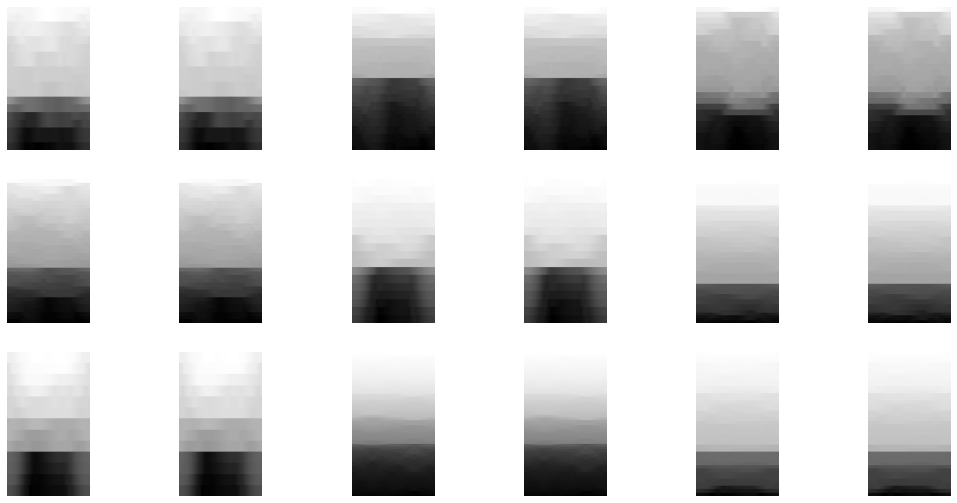

In [4]:
dls = DataBlock(
    blocks=(ImageBlock(cls=Tiff32Image), ImageBlock(cls=Tiff32Image)), 
    get_items=get_image_files,
    n_inp=1,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    batch_tfms=[IntToFloatTensor(div=2**16-1),],
        ).dataloaders(DATA_DIRECTORY/f"images/energies{THRESHOLD}", bs=32)

dls.show_batch()

## Train

### Create Learner

epoch,train_loss,valid_loss,time
0,0.014695,0.015853,00:13
1,0.004358,0.001771,00:07
2,0.001711,0.001342,00:06
3,0.000899,0.000563,00:06
4,0.000674,0.000670,00:06


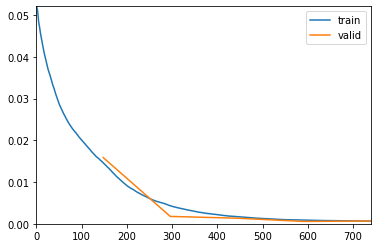

In [5]:
ae = SimpleAutoencoder(n_latent=128)
learn = Learner(dls, ae, F.mse_loss, cbs=[ShowGraphCallback()])
learn.fit_one_cycle(5)

## View Predictions

tensor([[[[0.2236, 0.2236, 0.2238,  ..., 0.2237, 0.2236, 0.2236],
          [0.2236, 0.2236, 0.2238,  ..., 0.2237, 0.2236, 0.2236],
          [0.2236, 0.2236, 0.2238,  ..., 0.2237, 0.2236, 0.2236],
          ...,
          [0.5500, 0.5500, 0.5502,  ..., 0.5501, 0.5500, 0.5500],
          [0.5500, 0.5500, 0.5502,  ..., 0.5501, 0.5500, 0.5500],
          [0.5500, 0.5500, 0.5502,  ..., 0.5501, 0.5500, 0.5500]]]],
       dtype=torch.float64)
[[-8.543831  -8.543831  -8.535758  ... -8.537959  -8.543831  -8.543831 ]
 [-8.543831  -8.543831  -8.535758  ... -8.537959  -8.543831  -8.543831 ]
 [-8.543831  -8.543831  -8.535758  ... -8.537959  -8.543831  -8.543831 ]
 ...
 [ 7.1526146  7.1526146  7.1650925 ...  7.162157   7.1526146  7.1526146]
 [ 7.1526146  7.1526146  7.1650925 ...  7.162157   7.1526146  7.1526146]
 [ 7.1526146  7.1526146  7.1650925 ...  7.162157   7.1526146  7.1526146]]
Dimensions of energy array don't match those of 2dm-1: resizing.
[[ -3.010147   -4.487195   -8.111279  ...  -8.645

array([<AxesSubplot:title={'center':'Input'}>,
       <AxesSubplot:title={'center':'Reconstruction'}>], dtype=object)

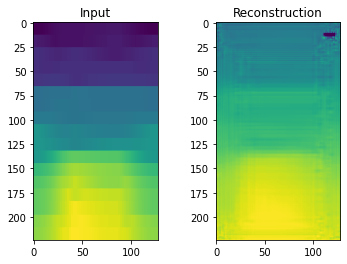

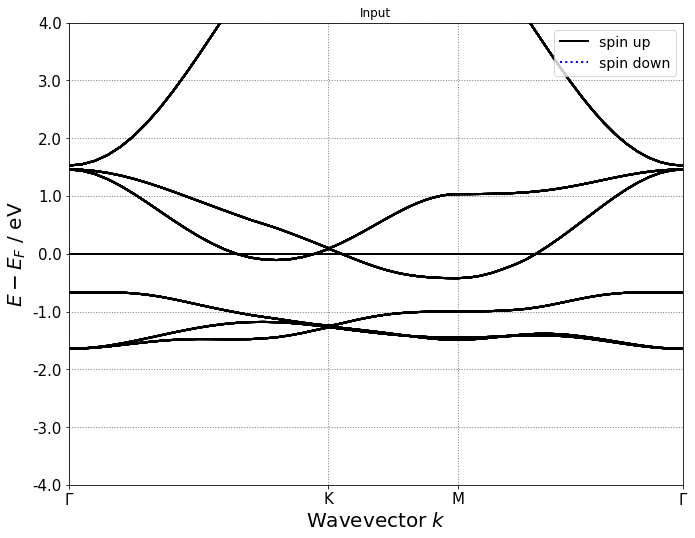

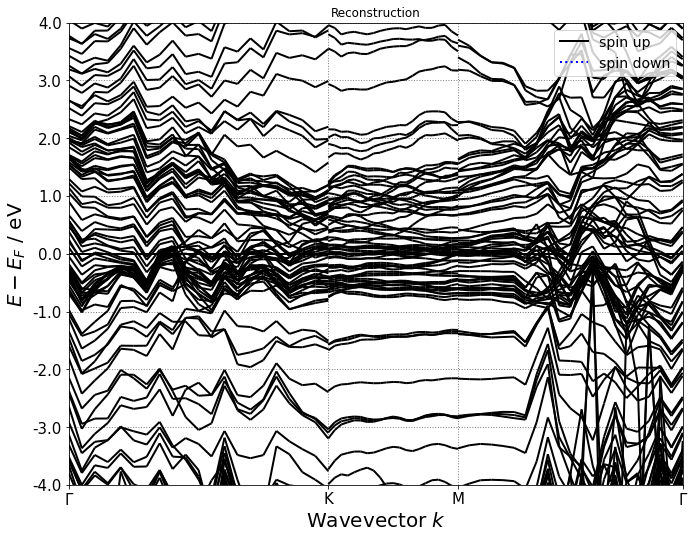

In [6]:
view_prediction("2dm-1", learn.model)